In [2]:
import itertools
import cv2
import otsu
import matplotlib.pyplot as plt
import numpy as np
import glob
import math
from PlotToImage import PlotToImage
from auto_tsmo import full_method
import time
import json
from itertools import chain

def ImShow(im, size=(13,16)):
    plt.figure(figsize = size)
    plt.imshow(im, 'gray')
    plt.show()

def HistPlot(vals, size=(14,17)):
    plt.figure(figsize = size)
    plt.plot(np.arange(len(vals)), vals)
    plt.show()

In [3]:
dataset_path = r'C:\Users\admin\Downloads\FLIR\FLIR_ADAS\training\PreviewData'
#rgb_path = r'C:\Users\admin\Downloads\FLIR\FLIR_ADAS\training\RGB'
dataset_files = [file for file in glob.glob(dataset_path + "//*.jpeg")]
#rgb_files = [file for file in glob.glob(rgb_path + "//*.jpg")]
night_inds = list(chain(range(136,184),range(3672,4086),range(5512,6298),range(6975,8619)))
train_dataset = [dataset_files[i] for i in night_inds]
print(len(train_dataset), train_dataset)

2892 ['C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\training\\PreviewData\\FLIR_00137.jpeg', 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\training\\PreviewData\\FLIR_00138.jpeg', 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\training\\PreviewData\\FLIR_00139.jpeg', 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\training\\PreviewData\\FLIR_00140.jpeg', 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\training\\PreviewData\\FLIR_00141.jpeg', 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\training\\PreviewData\\FLIR_00142.jpeg', 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\training\\PreviewData\\FLIR_00143.jpeg', 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\training\\PreviewData\\FLIR_00144.jpeg', 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\training\\PreviewData\\FLIR_00145.jpeg', 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\training\\PreviewData\\FLIR_00146.jpeg', 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\training\\PreviewData\\FLIR_00147.jpeg', 'C:\\Users\\admin\\Downloa

In [30]:
# import pickle
# with open("FLIR_train_dataset.txt", "wb") as file:   
#     pickle.dump(train_dataset, file)
# with open("FLIR_train_dataset.txt", "rb") as file:  
#     train_dataset = pickle.load(file)
# print(len(train_dataset), train_dataset)

In [14]:
ann_path = r'C:\Users\admin\Downloads\FLIR\FLIR_ADAS\training\Annotations'
ann_dataset = [ann_path + file[-16:-5] + '.json' for file in train_dataset]
ann_data = {}
for i, file in enumerate(ann_dataset):
    ann_sample = []
    with open(file, "r") as read_file:
        data = json.load(read_file)
        for ann in data['annotation']:
            if ann['category_id'] == str(1):
                ann_sample.append(ann['bbox'])
    ann_data[train_dataset[i]] = ann_sample
print(len(ann_data), ann_data)

2892 {'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\training\\PreviewData\\FLIR_00137.jpeg': [], 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\training\\PreviewData\\FLIR_00138.jpeg': [], 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\training\\PreviewData\\FLIR_00139.jpeg': [], 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\training\\PreviewData\\FLIR_00140.jpeg': [], 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\training\\PreviewData\\FLIR_00141.jpeg': [], 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\training\\PreviewData\\FLIR_00142.jpeg': [], 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\training\\PreviewData\\FLIR_00143.jpeg': [], 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\training\\PreviewData\\FLIR_00144.jpeg': [], 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\training\\PreviewData\\FLIR_00145.jpeg': [], 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\training\\PreviewData\\FLIR_00146.jpeg': [], 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\training\\PreviewData\\FLIR

In [13]:
with open('FLIR_train_groundtruth.json', 'w') as outfile:
    json.dump(ann_data, outfile)

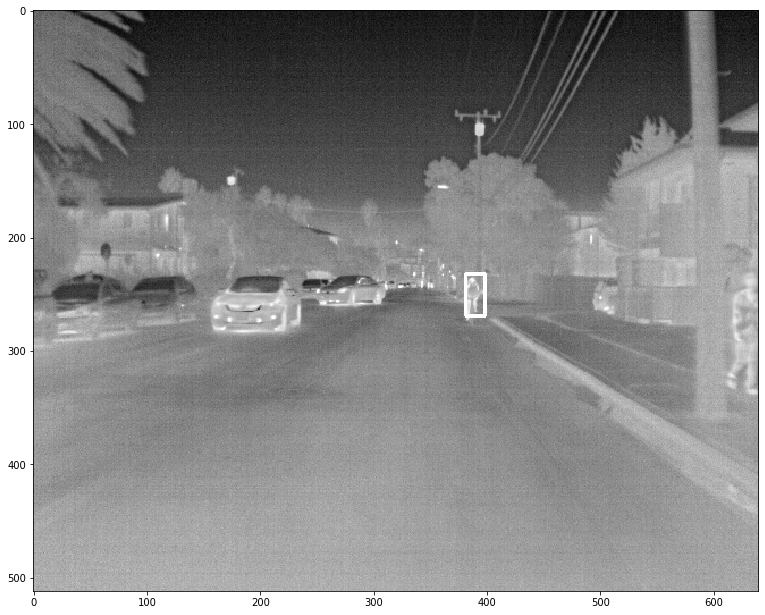

In [59]:
image = cv2.imread(r'C:\Users\admin\Downloads\FLIR\FLIR_ADAS\training\PreviewData\FLIR_07480.jpeg', 0)
cv2.rectangle(image, (381,232), (381+17,232+37), (255,0,0), 2)
ImShow(image)

In [17]:
dataset_path = r'C:\Users\admin\Downloads\FLIR\FLIR_ADAS\validation\PreviewData'
#rgb_path = r'C:\Users\admin\Downloads\FLIR\FLIR_ADAS\training\RGB'
dataset_files = [file for file in glob.glob(dataset_path + "//*.jpeg")]
#rgb_files = [file for file in glob.glob(rgb_path + "//*.jpg")]
night_inds = np.array(list(chain(range(8863, 9017), range(9321, 9669)))) 
night_inds -= night_inds[0]
train_dataset = [dataset_files[i] for i in night_inds]
print(len(train_dataset), train_dataset)

502 ['C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08863.jpeg', 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08864.jpeg', 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08865.jpeg', 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08866.jpeg', 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08867.jpeg', 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08868.jpeg', 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08869.jpeg', 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08870.jpeg', 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08871.jpeg', 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08872.jpeg', 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08873.jpeg', 'C:\\

In [31]:
# import pickle
# with open("FLIR_val_dataset.txt", "wb") as file:   
#     pickle.dump(train_dataset, file)
# with open("FLIR_val_dataset.txt", "rb") as file:  
#     train_dataset = pickle.load(file)
# print(len(train_dataset), train_dataset)

In [21]:
ann_path = r'C:\Users\admin\Downloads\FLIR\FLIR_ADAS\validation\Annotations'
ann_dataset = [ann_path + file[-16:-5] + '.json' for file in train_dataset]
ann_data = {}
for i, file in enumerate(ann_dataset):
#     print(file, train_dataset[i])
    ann_sample = []
    with open(file, "r") as read_file:
        data = json.load(read_file)
        for ann in data['annotation']:
            if ann['category_id'] == str(1):
                ann_sample.append(ann['bbox'])
    ann_data[train_dataset[i]] = ann_sample
print(len(ann_data), ann_data)

502 {'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08863.jpeg': [[580, 206, 34, 75], [609, 207, 30, 116]], 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08864.jpeg': [[369, 193, 74, 126], [488, 192, 49, 134], [544, 200, 32, 104], [522, 198, 31, 95]], 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08865.jpeg': [[224, 210, 34, 101], [189, 202, 54, 114], [312, 202, 71, 123], [386, 206, 24, 97], [408, 204, 23, 100], [440, 209, 40, 96], [431, 204, 14, 20], [442, 205, 14, 22], [478, 202, 12, 59]], 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08866.jpeg': [[474, 204, 22, 70], [450, 203, 14, 62], [428, 203, 26, 69], [348, 204, 53, 102], [298, 206, 29, 100], [326, 280, 15, 24], [207, 204, 66, 116], [112, 218, 45, 95], [84, 203, 35, 110]], 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08867.jpeg': [[473, 202, 28, 75], [446, 201, 17, 59], [433,

In [23]:
with open('FLIR_val_groundtruth.json', 'w') as outfile:
    json.dump(ann_data, outfile)

In [24]:
ann_data

{'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08863.jpeg': [[580,
   206,
   34,
   75],
  [609, 207, 30, 116]],
 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08864.jpeg': [[369,
   193,
   74,
   126],
  [488, 192, 49, 134],
  [544, 200, 32, 104],
  [522, 198, 31, 95]],
 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08865.jpeg': [[224,
   210,
   34,
   101],
  [189, 202, 54, 114],
  [312, 202, 71, 123],
  [386, 206, 24, 97],
  [408, 204, 23, 100],
  [440, 209, 40, 96],
  [431, 204, 14, 20],
  [442, 205, 14, 22],
  [478, 202, 12, 59]],
 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08866.jpeg': [[474,
   204,
   22,
   70],
  [450, 203, 14, 62],
  [428, 203, 26, 69],
  [348, 204, 53, 102],
  [298, 206, 29, 100],
  [326, 280, 15, 24],
  [207, 204, 66, 116],
  [112, 218, 45, 95],
  [84, 203, 35, 110]],
 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\P

In [29]:
list(ann_data.keys())

['C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08863.jpeg',
 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08864.jpeg',
 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08865.jpeg',
 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08866.jpeg',
 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08867.jpeg',
 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08868.jpeg',
 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08869.jpeg',
 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08870.jpeg',
 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08871.jpeg',
 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08872.jpeg',
 'C:\\Users\\admin\\Downloads\\FLIR\\FLIR_ADAS\\validation\\PreviewData\\FLIR_08873.jpeg',

In [36]:
video_path = r'C:\Users\admin\Google\HumanDetection\Data\video.mp4'
video_data_path = r'C:\Users\admin\Google\HumanDetection\Data\frames/'

cap = cv2.VideoCapture(video_path)

first_frame = 1000
current_frame = -1

while(cap.isOpened()):
    current_frame += 1
    
    ret, frame = cap.read()
    
    if (current_frame < first_frame):
        continue
    
    if (current_frame == 1500):
        break
        
    cv2.imwrite(video_data_path + 'video_frame_' + str(current_frame) + '.jpeg', frame)
    
    cv2.imshow('frame', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [37]:
video_train_dataset = [file for file in glob.glob(video_data_path + "*.jpeg")]

In [40]:
video_train_data = {}
for i in range(1000, 1500):
    video_train_data[i] = video_train_dataset[i-1000]
video_train_data

{1000: 'C:\\Users\\admin\\Google\\HumanDetection\\Data\\frames\\video_frame_1000.jpeg',
 1001: 'C:\\Users\\admin\\Google\\HumanDetection\\Data\\frames\\video_frame_1001.jpeg',
 1002: 'C:\\Users\\admin\\Google\\HumanDetection\\Data\\frames\\video_frame_1002.jpeg',
 1003: 'C:\\Users\\admin\\Google\\HumanDetection\\Data\\frames\\video_frame_1003.jpeg',
 1004: 'C:\\Users\\admin\\Google\\HumanDetection\\Data\\frames\\video_frame_1004.jpeg',
 1005: 'C:\\Users\\admin\\Google\\HumanDetection\\Data\\frames\\video_frame_1005.jpeg',
 1006: 'C:\\Users\\admin\\Google\\HumanDetection\\Data\\frames\\video_frame_1006.jpeg',
 1007: 'C:\\Users\\admin\\Google\\HumanDetection\\Data\\frames\\video_frame_1007.jpeg',
 1008: 'C:\\Users\\admin\\Google\\HumanDetection\\Data\\frames\\video_frame_1008.jpeg',
 1009: 'C:\\Users\\admin\\Google\\HumanDetection\\Data\\frames\\video_frame_1009.jpeg',
 1010: 'C:\\Users\\admin\\Google\\HumanDetection\\Data\\frames\\video_frame_1010.jpeg',
 1011: 'C:\\Users\\admin\\Google

In [41]:
with open("video_ground_truth.json", "r") as read_file:
    video_ground_truth = json.load(read_file)
video_ground_truth

{'1000': [[556, 74, 18, 30], [622, 77, 13, 25]],
 '1001': [[556, 74, 18, 30], [622, 77, 13, 25]],
 '1002': [[556, 74, 18, 30], [622, 77, 13, 25]],
 '1003': [[559, 76, 13, 28], [624, 78, 10, 26]],
 '1004': [[559, 76, 13, 28], [624, 78, 10, 26]],
 '1005': [[559, 76, 13, 28], [624, 78, 10, 26]],
 '1006': [[562, 75, 13, 27], [624, 79, 10, 24]],
 '1007': [[562, 75, 13, 27], [624, 79, 10, 24]],
 '1008': [[562, 75, 13, 27], [624, 79, 10, 24]],
 '1009': [[562, 75, 13, 27], [624, 79, 10, 24]],
 '1010': [[561, 74, 17, 29], [624, 79, 10, 23]],
 '1011': [[561, 74, 17, 29], [624, 79, 10, 23]],
 '1012': [[561, 74, 17, 29], [624, 79, 10, 23]],
 '1013': [[561, 74, 17, 29], [624, 79, 10, 23]],
 '1014': [[561, 74, 17, 29], [624, 79, 10, 23]],
 '1015': [[563, 72, 18, 31], [623, 79, 11, 23]],
 '1016': [[563, 72, 18, 31], [623, 79, 11, 23]],
 '1017': [[563, 72, 18, 31], [623, 79, 11, 23]],
 '1018': [[563, 72, 18, 31], [623, 79, 11, 23]],
 '1019': [[563, 72, 18, 31], [623, 79, 11, 23]],
 '1020': [[622, 79, 

In [50]:
data = {}
for key in video_ground_truth:
    data[video_train_data[int(key)]] = video_ground_truth[key]
data

{'C:\\Users\\admin\\Google\\HumanDetection\\Data\\frames\\video_frame_1000.jpeg': [[556,
   74,
   18,
   30],
  [622, 77, 13, 25]],
 'C:\\Users\\admin\\Google\\HumanDetection\\Data\\frames\\video_frame_1001.jpeg': [[556,
   74,
   18,
   30],
  [622, 77, 13, 25]],
 'C:\\Users\\admin\\Google\\HumanDetection\\Data\\frames\\video_frame_1002.jpeg': [[556,
   74,
   18,
   30],
  [622, 77, 13, 25]],
 'C:\\Users\\admin\\Google\\HumanDetection\\Data\\frames\\video_frame_1003.jpeg': [[559,
   76,
   13,
   28],
  [624, 78, 10, 26]],
 'C:\\Users\\admin\\Google\\HumanDetection\\Data\\frames\\video_frame_1004.jpeg': [[559,
   76,
   13,
   28],
  [624, 78, 10, 26]],
 'C:\\Users\\admin\\Google\\HumanDetection\\Data\\frames\\video_frame_1005.jpeg': [[559,
   76,
   13,
   28],
  [624, 78, 10, 26]],
 'C:\\Users\\admin\\Google\\HumanDetection\\Data\\frames\\video_frame_1006.jpeg': [[562,
   75,
   13,
   27],
  [624, 79, 10, 24]],
 'C:\\Users\\admin\\Google\\HumanDetection\\Data\\frames\\video_frame

In [51]:
with open('video_groundtruth.json', 'w') as outfile:
    json.dump(data, outfile)